# task1

主要参考：https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models


In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('dataSets/big_trainset_task1.csv').set_index(['intersection_id','tollgate_id','time_window'])
test = pd.read_csv('dataSets/big_testset_task1.csv').set_index(['intersection_id','tollgate_id','time_window'])

In [2]:
X_train = train.drop('avg_travel_time',axis=1).values
X_test = test.drop('avg_travel_time',axis=1).values
y = train.avg_travel_time.values

In [3]:
del test,train

In [4]:
# 尝试基本的线性回归及正则化线性回归模型
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics.scorer import make_scorer
from sklearn.utils import check_array
# 定义评分函数
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))
score = make_scorer(MAPE, greater_is_better=False)

LR = LinearRegression()
# Sklearn 计算模型的负均方误差，所以我们需要先取负再开根号得到我们的参数均方根误差
# cv = 5 会将数据分成大小相似的10份，轮流用9份用来训练，１份用来评估计算得分，会得到10个得分
test_score = cross_val_score(LR, X_train, y, cv=10, scoring=score)
print(test_score)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[-0.25288691 -0.25552983 -0.25303579 -0.33545167 -0.33789601 -0.22260081
 -0.22165894 -0.24172606 -0.24010769 -0.23125585]


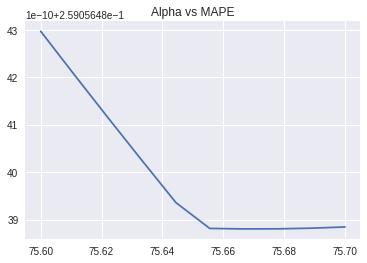

In [17]:
# ridge回归
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
alphas = np.linspace(75.6, 75.7, 10)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = cross_val_score(clf, X_train, y, cv=10, scoring=score)
    test_scores.append(np.mean(test_score))

plt.plot(alphas, test_scores)
plt.title("Alpha vs MAPE");

#### 模型１：Ridge(76.66) 得分０．２５９０５６４８

In [26]:
# Lasso
param_grid = {
 'alpha':np.linspace(0.018,0.02, 10)
}

grid_search = GridSearchCV(Lasso(),param_grid=param_grid,cv=5, verbose=2,n_jobs =4,
                          scoring=score,error_score=0,refit=True)
grid_search.fit(X_train, y)
print grid_search.best_params_
print grid_search.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=0.018 .....................................................
[CV] alpha=0.018 .....................................................
[CV] alpha=0.018 .....................................................
[CV] alpha=0.018 .....................................................
[CV] ............................................ alpha=0.018 -   7.8s
[CV] alpha=0.018 .....................................................
[CV] ............................................ alpha=0.018 -   8.7s
[CV] alpha=0.0182222222222 ...........................................
[CV] ............................................ alpha=0.018 -   8.7s
[CV] ............................................ alpha=0.018 -   8.6s
[CV] alpha=0.0182222222222 ...........................................
[CV] alpha=0.0182222222222 ...........................................
[CV] ............................................ alpha=0.018 -   8.3s
[CV] alpha=0.018

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.3min


[CV] .................................. alpha=0.0193333333333 -   9.0s
[CV] alpha=0.0195555555556 ...........................................
[CV] .................................. alpha=0.0193333333333 -   8.5s
[CV] alpha=0.0195555555556 ...........................................
[CV] .................................. alpha=0.0195555555556 -   8.4s
[CV] alpha=0.0195555555556 ...........................................
[CV] .................................. alpha=0.0195555555556 -   8.5s
[CV] alpha=0.0197777777778 ...........................................
[CV] .................................. alpha=0.0195555555556 -   7.9s
[CV] alpha=0.0197777777778 ...........................................
[CV] .................................. alpha=0.0195555555556 -   8.6s
[CV] alpha=0.0197777777778 ...........................................
[CV] .................................. alpha=0.0195555555556 -   8.4s
[CV] alpha=0.0197777777778 ...........................................
[CV] .

[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.8min finished


{'alpha': 0.01822222222222222}
-0.259375626429


##### 模型２Lasso(0.0182):0.259375626429

#### 尝试ｘｇｂｏｏｓｔ

In [5]:
import xgboost as xgb

regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.05,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=3000,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

est_score = cross_val_score(regr, X_train, y, cv=10, scoring=score,verbose=2)
print(test_score)

[CV]  ................................................................
[CV] ................................................. , total=  38.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.5s remaining:    0.0s


[CV] ................................................. , total=  22.3s
[CV]  ................................................................
[CV] ................................................. , total=  36.7s
[CV]  ................................................................
[CV] ................................................. , total=  28.4s
[CV]  ................................................................
[CV] ................................................. , total=  44.0s
[CV]  ................................................................
[CV] ................................................. , total= 1.2min
[CV]  ................................................................
[CV] ................................................. , total=  43.0s
[CV]  ................................................................
[CV] ................................................. , total=  38.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.6min finished


In [9]:
print(np.mean(est_score))

-0.268610506067


## 尝试随机森林，极端随机树

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
rfr = RandomForestRegressor(n_estimators=800, max_depth=None, min_samples_leaf=1, random_state=0,n_jobs=-1)
er = ExtraTreesRegressor(n_estimators=800, max_depth=None, min_samples_leaf=1, random_state=0,n_jobs=-1)

In [15]:
test_score = cross_val_score(rfr, X_train, y, cv=10, scoring=score,verbose=2)
print(np.mean(test_score))

[CV]  ................................................................
[CV] ................................................. , total= 1.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV] ................................................. , total= 1.8min
[CV]  ................................................................
[CV] ................................................. , total= 1.8min
[CV]  ................................................................
[CV] ................................................. , total= 1.8min
[CV]  ................................................................
[CV] ................................................. , total= 1.8min
[CV]  ................................................................
[CV] ................................................. , total= 1.7min
[CV]  ................................................................
[CV] ................................................. , total= 1.8min
[CV]  ................................................................
[CV] ................................................. , total= 1.7min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 18.2min finished


In [16]:
test_score = cross_val_score(er, X_train, y, cv=10, scoring=score,verbose=2)
print(np.mean(test_score))

[CV]  ................................................................
[CV] ................................................. , total= 3.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s


[CV] ................................................. , total= 2.9min
[CV]  ................................................................
[CV] ................................................. , total= 3.0min
[CV]  ................................................................
[CV] ................................................. , total= 2.7min
[CV]  ................................................................
[CV] ................................................. , total= 2.8min
[CV]  ................................................................
[CV] ................................................. , total= 2.5min
[CV]  ................................................................
[CV] ................................................. , total= 2.9min
[CV]  ................................................................
[CV] ................................................. , total= 2.9min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 27.7min finished


In [18]:
r = Ridge(76.66)
r.fit(X_train, y)
test = pd.read_csv('dataSets/big_testset_task1.csv').set_index(['intersection_id','tollgate_id','time_window'])
test['avg_travel_time'] = r.predict(X_test)
test['avg_travel_time'].to_csv('ridge.csv',index = True)

In [20]:
test['avg_travel_time'].reset_index().to_csv('ridge.csv',index = False)

## task2

In [21]:
train = pd.read_csv('dataSets/big_trainset_task2.csv').set_index(['tollgate_id','time_window','direction'])
test = pd.read_csv('dataSets/big_testset_task2.csv').set_index(['tollgate_id','time_window','direction'])

X_train = train.drop('volume',axis=1).values
X_test = test.drop('volume',axis=1).values
y = train.volume.values

In [26]:
LR.fit(X_train, y)
test['volume'] = LR.predict(X_test)
test['volume'].reset_index().to_csv('LRtask2.csv',index = False)